In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import torch

#from azureml.core import Workspace
#from azureml.core import Experiment
#from azureml.opendatasets import Diabetes


from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

In [2]:

rating_data = pd.read_csv('./rating.csv')
food_data = pd.read_csv('./food_id.csv')

In [3]:
rating_data.head()


,geo_id,store,enviRating,qualRating,서블레이팅,food_id,food_category,district,food_category2,ratingCount,menu,goodTagDistvalue
0,1,그 몇 해 동안 마라탕,NaN,NaN,NaN,221,맛있는 음식 마라탕,장안구,마라탕,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN
1,1,강기쇠고기 열간면,3.53,3.52,3.52,2983,미식_열간면,장안구,열간면,1,강기쇠고기 열간면 강기쇠고기 열간면,NaN
2,1,파계생분면점,3.64,3.63,3.63,1817,맛있는 음식점,장안구,분식집,1,발계생분면 가게 발계생분면,NaN
3,1,왕장훙가정식백반,3.71,3.71,3.71,1783,맛있는 요리,장안구,가정식 요리,4,왕장훙가정식백반 요리 왕장훙가정식백반 요리,NaN
4,1,특색 요화관 황장닭밥,3.58,3.58,3.58,34295,미식_황장닭,장안구,황장계,1,특색 요화관 황장닭밥 특색 요화관 황장닭밥,NaN


In [4]:
food_data.head()

,food_id,food_category,Unnamed: 2,menu
0,221,맛있는 음식 마라탕,NaN,그 몇 년 동안 마라탕은 그 해 마라탕이었다
1,2983,미식_열간면,NaN,강기쇠고기 열간면 강기쇠고기 열간면
2,1817,맛있는 음식점,NaN,발계생분면 가게 발계생분면
3,1783,맛있는 요리,NaN,왕장훙가정식백반 요리 왕장훙가정식백반 요리
4,34295,미식_황장닭,NaN,특색 요화관 황장닭밥 특색 요화관 황장닭밥


In [5]:
rating_data.drop('store', axis = 1, inplace = True)
rating_data.head()

,geo_id,enviRating,qualRating,서블레이팅,food_id,food_category,district,food_category2,ratingCount,menu,goodTagDistvalue
0,1,NaN,NaN,NaN,221,맛있는 음식 마라탕,장안구,마라탕,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN
1,1,3.53,3.52,3.52,2983,미식_열간면,장안구,열간면,1,강기쇠고기 열간면 강기쇠고기 열간면,NaN
2,1,3.64,3.63,3.63,1817,맛있는 음식점,장안구,분식집,1,발계생분면 가게 발계생분면,NaN
3,1,3.71,3.71,3.71,1783,맛있는 요리,장안구,가정식 요리,4,왕장훙가정식백반 요리 왕장훙가정식백반 요리,NaN
4,1,3.58,3.58,3.58,34295,미식_황장닭,장안구,황장계,1,특색 요화관 황장닭밥 특색 요화관 황장닭밥,NaN


In [6]:
rating_data.drop('enviRating', axis = 1, inplace = True)
rating_data.head()

,geo_id,qualRating,서블레이팅,food_id,food_category,district,food_category2,ratingCount,menu,goodTagDistvalue
0,1,NaN,NaN,221,맛있는 음식 마라탕,장안구,마라탕,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN
1,1,3.52,3.52,2983,미식_열간면,장안구,열간면,1,강기쇠고기 열간면 강기쇠고기 열간면,NaN
2,1,3.63,3.63,1817,맛있는 음식점,장안구,분식집,1,발계생분면 가게 발계생분면,NaN
3,1,3.71,3.71,1783,맛있는 요리,장안구,가정식 요리,4,왕장훙가정식백반 요리 왕장훙가정식백반 요리,NaN
4,1,3.58,3.58,34295,미식_황장닭,장안구,황장계,1,특색 요화관 황장닭밥 특색 요화관 황장닭밥,NaN


In [7]:
rating_data.drop('qualRating', axis = 1, inplace = True)
#rating_data.drop('서블레이팅',axis = 1, inplace = True)
rating_data.head()

,geo_id,서블레이팅,food_id,food_category,district,food_category2,ratingCount,menu,goodTagDistvalue
0,1,NaN,221,맛있는 음식 마라탕,장안구,마라탕,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN
1,1,3.52,2983,미식_열간면,장안구,열간면,1,강기쇠고기 열간면 강기쇠고기 열간면,NaN
2,1,3.63,1817,맛있는 음식점,장안구,분식집,1,발계생분면 가게 발계생분면,NaN
3,1,3.71,1783,맛있는 요리,장안구,가정식 요리,4,왕장훙가정식백반 요리 왕장훙가정식백반 요리,NaN
4,1,3.58,34295,미식_황장닭,장안구,황장계,1,특색 요화관 황장닭밥 특색 요화관 황장닭밥,NaN


In [8]:
rating_data.drop('food_category', axis = 1, inplace = True)
rating_data.head()

,geo_id,서블레이팅,food_id,district,food_category2,ratingCount,menu,goodTagDistvalue
0,1,NaN,221,장안구,마라탕,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN
1,1,3.52,2983,장안구,열간면,1,강기쇠고기 열간면 강기쇠고기 열간면,NaN
2,1,3.63,1817,장안구,분식집,1,발계생분면 가게 발계생분면,NaN
3,1,3.71,1783,장안구,가정식 요리,4,왕장훙가정식백반 요리 왕장훙가정식백반 요리,NaN
4,1,3.58,34295,장안구,황장계,1,특색 요화관 황장닭밥 특색 요화관 황장닭밥,NaN


In [9]:
rating_data.drop('district', axis = 1, inplace = True)
rating_data.head()

,geo_id,서블레이팅,food_id,food_category2,ratingCount,menu,goodTagDistvalue
0,1,NaN,221,마라탕,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN
1,1,3.52,2983,열간면,1,강기쇠고기 열간면 강기쇠고기 열간면,NaN
2,1,3.63,1817,분식집,1,발계생분면 가게 발계생분면,NaN
3,1,3.71,1783,가정식 요리,4,왕장훙가정식백반 요리 왕장훙가정식백반 요리,NaN
4,1,3.58,34295,황장계,1,특색 요화관 황장닭밥 특색 요화관 황장닭밥,NaN


In [10]:
rating_data.drop('food_category2', axis = 1, inplace = True)
rating_data.head()

,geo_id,서블레이팅,food_id,ratingCount,menu,goodTagDistvalue
0,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN
1,1,3.52,2983,1,강기쇠고기 열간면 강기쇠고기 열간면,NaN
2,1,3.63,1817,1,발계생분면 가게 발계생분면,NaN
3,1,3.71,1783,4,왕장훙가정식백반 요리 왕장훙가정식백반 요리,NaN
4,1,3.58,34295,1,특색 요화관 황장닭밥 특색 요화관 황장닭밥,NaN


In [11]:
#rating_data.drop('ratingCount', axis = 1, inplace = True)
#rating_data.head()

In [12]:
rating_data.head()

,geo_id,서블레이팅,food_id,ratingCount,menu,goodTagDistvalue
0,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN
1,1,3.52,2983,1,강기쇠고기 열간면 강기쇠고기 열간면,NaN
2,1,3.63,1817,1,발계생분면 가게 발계생분면,NaN
3,1,3.71,1783,4,왕장훙가정식백반 요리 왕장훙가정식백반 요리,NaN
4,1,3.58,34295,1,특색 요화관 황장닭밥 특색 요화관 황장닭밥,NaN


In [13]:
food_data.drop('menu', axis = 1, inplace = True)
food_data.head()

,food_id,food_category,Unnamed: 2
0,221,맛있는 음식 마라탕,NaN
1,2983,미식_열간면,NaN
2,1817,맛있는 음식점,NaN
3,1783,맛있는 요리,NaN
4,34295,미식_황장닭,NaN


In [14]:
food_data.drop('Unnamed: 2', axis = 1, inplace = True)
food_data.head()

,food_id,food_category
0,221,맛있는 음식 마라탕
1,2983,미식_열간면
2,1817,맛있는 음식점
3,1783,맛있는 요리
4,34295,미식_황장닭


In [15]:
user_movie_data = pd.merge(rating_data, food_data, on = 'food_id')
user_movie_data.head()

,geo_id,서블레이팅,food_id,ratingCount,menu,goodTagDistvalue,food_category
0,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
1,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
2,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
3,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
4,1,3.7,221,2,쥐신 쌀실 마라탕 쥐신 쌀실 마라탕,NaN,맛있는 음식 마라탕


In [16]:

user_food_data = pd.merge(rating_data, food_data, on = 'food_id')
user_food_data.head()

,geo_id,서블레이팅,food_id,ratingCount,menu,goodTagDistvalue,food_category
0,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
1,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
2,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
3,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
4,1,3.7,221,2,쥐신 쌀실 마라탕 쥐신 쌀실 마라탕,NaN,맛있는 음식 마라탕


In [17]:
# rating_count 가중치 더해주는 부분
# 가점 방식도 고려

##########################################################

#ratingCount = user_food_data.ratingCount
#ratingCount.head()



In [18]:
#ratingCount = ratingCount / 10
#ratingCount.head()

In [19]:
#for i, row in user_food_data.iterrows() :
#    if user_food_data.at[i,'ratingCount'] < 100 and user_food_data.at[i,'ratingCount'] > 0:
#        user_food_data.at[i, '서블레이팅'] = user_food_data.at[i, '서블레이팅'] * 0.5 + 0.05 * ratingCount.at[i] * user_food_data.at[i, '서블레이팅']
        
#user_food_data.head()

##########################################################

In [20]:
#goodtag_value와 ratingCount 가중치 더해주기
# 먼저 별점에 적용 -> 후에 column으로 추가해서 ml에 적용해보기

##########################################################



In [21]:
for i, row in user_food_data.iterrows() :
    #print(user_food_data.at[i,'goodTagDistvalue'])
    if str(type(user_food_data.at[i,'goodTagDistvalue'])) == "<class 'str'>" :
        Sum = 0
        Split = user_food_data.at[i,'goodTagDistvalue'].split('|')
        #print(Split)
        for x in range(0,len(Split)) :
            
            Sum = Sum + int(Split[x])
        user_food_data.at[i,'goodTagDistvalue'] = Sum
        
#for i, row in user_food_data.iterrows() :
#    print(user_food_data.at[i,'goodTagDistvalue'])      
user_food_data.head()

,geo_id,서블레이팅,food_id,ratingCount,menu,goodTagDistvalue,food_category
0,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
1,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
2,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
3,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
4,1,3.7,221,2,쥐신 쌀실 마라탕 쥐신 쌀실 마라탕,NaN,맛있는 음식 마라탕


In [22]:
ratingCount = user_food_data.ratingCount
goodtagValue = user_food_data.goodTagDistvalue

weight = goodtagValue/ratingCount

print(weight)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8        1.23529
9        1.23529
10       1.23529
11       1.23529
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27          0.64
28          0.64
29          0.64
          ...   
6508         NaN
6509         NaN
6510         NaN
6511         NaN
6512         NaN
6513         NaN
6514         NaN
6515         NaN
6516    0.541667
6517    0.545455
6518    0.545455
6519         NaN
6520         NaN
6521         0.6
6522         0.6
6523         0.6
6524    0.674772
6525    0.674772
6526    0.674772
6527    0.266667
6528    0.266667
6529    0.266667
6530         NaN
6531         NaN
6532         NaN
6533         NaN
6534        0.25
6535    0.5991

In [23]:
weight.fillna(0)

for i, row in user_food_data.iterrows() :
        user_food_data.at[i, '서블레이팅'] = user_food_data.at[i, '서블레이팅'] +  weight.at[i] / 2
        
user_food_data.head()

,geo_id,서블레이팅,food_id,ratingCount,menu,goodTagDistvalue,food_category
0,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
1,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
2,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
3,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
4,1,NaN,221,2,쥐신 쌀실 마라탕 쥐신 쌀실 마라탕,NaN,맛있는 음식 마라탕


In [61]:
for i, row in user_food_data.iterrows() :
    print(user_food_data.at[i,'서블레이팅'])

nan
nan
nan
nan
nan
nan
nan
nan
4.40764705882353
4.40764705882353
4.40764705882353
4.40764705882353
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3.92
3.92
3.92
3.92
3.92
3.92
3.92
3.92
3.92
3.92
3.92
3.6775
3.6775
3.6775
3.6775
3.6775
3.6775
3.6775
3.6775
3.6775
3.6775
3.6775
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3.8257142857142856
3

4.18
4.18
4.18
4.18
4.18
4.18
4.18
4.18
4.18
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
4.029999999999999
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4.19
4.19
4.19
4.19
4.19
4.19
4.19
4.19
4.19
4.19
4.19
4.19
4.19
4.19
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
3.90625
4.111969696969697
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3.8000000000000003
3.8000000000000003
3.8000000000000003
3.8000000000000003
3.8000000000000003
3.8000000000000003
3.8000000000000003
3.8000000000000003
3.8000000000000003
3.8000000000000003
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4.186470588235294
4.186470588235294
4.186470588235294
4.186470588235294
4.186470588235294
4.186470

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
3.9257142857142857
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
7.319999999999999
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4.356521739130435
4.356521739130435
4.356521739130435
4.356521739130435
4.3565217

In [24]:
user_food_data.shape

(6538, 7)

In [25]:
food_data.shape

(360, 2)

In [26]:
rating_data.shape

(360, 6)

In [27]:
user_food_data.shape

(6538, 7)

In [28]:
user_food_rating = user_food_data.pivot_table('서블레이팅', index ='geo_id', columns ='food_category' ).fillna(0)

In [29]:
user_food_rating.shape

(9, 60)

In [30]:
user_food_rating.head()

food_category,간식,디저트,맛있는 빵 디저트,맛있는 요리,맛있는 음식,맛있는 음식 냄비,맛있는 음식 마라탕,맛있는 음식_사천식 샤브샤브/마라샤브,맛있는 음식_샤브샤브,맛있는 음식_토종 닭장,...,미식_황장닭,미식_후베이요리/가정식 요리,미식만두,미식점,불고기,뷔페,생선,음식점,푸저우요리,할로겐맛 오리목
geo_id,,,,,,,,,,,,,,,,,,,,,
1,4.517931,4.915922,0.0,0.0,3.973333,0.0,0.000000,0.0,0.0,0.000000,...,3.883846,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,3.993235,0.0,0.0,0.0,0.0,3.967143
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4.283367
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,4.407647,0.0,0.0,0.000000,...,0.000000,4.026667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
5,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,4.137778,...,0.000000,3.996853,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [31]:
food_user_rating = user_food_rating.values.T
food_user_rating.shape

(60, 9)

In [32]:
type(food_user_rating)

numpy.ndarray

In [33]:
#SVD = TruncatedSVD(n_components = 9)
#matrix = SVD.fit_transform(food_user_rating)
#matrix.shape

In [34]:
SVD = TruncatedSVD(n_components = 5)
matrix = SVD.fit_transform(food_user_rating)
matrix.shape

(60, 5)

In [35]:
matrix[0]

array([ 0.72245974,  2.76385206, -1.96198893,  2.60361679, -1.04557501])

In [36]:
corr = np.corrcoef(matrix)
corr.shape

(60, 60)

In [37]:
corr2 = corr[:50, :50]
corr2.shape

(50, 50)

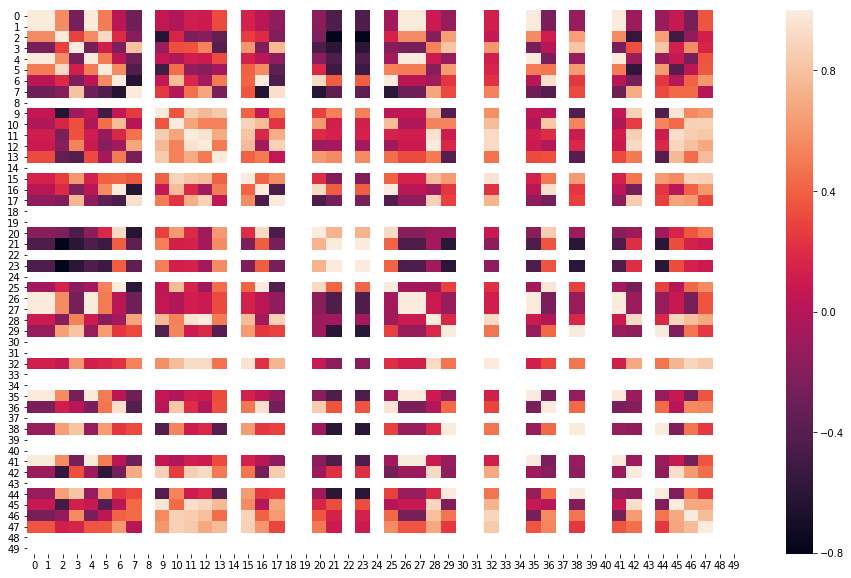

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(corr2)

In [39]:
food_title = user_food_rating.columns
food_title_list = list(food_title)
coffey_hands = food_title_list.index("미식만두")

In [40]:
corr_coffey_hands = corr[coffey_hands]
list(food_title[(corr_coffey_hands >= 0.9)])[:10]

[]

In [41]:
#미식만두와 비슷한 음식종류 들을 뽑음


In [42]:
#지역마다 음식종류 추천해주기

In [43]:
df_rating = pd.read_csv('./rating.csv')
df_food = pd.read_csv('./food_id.csv')

In [44]:
df_user_food_data = pd.merge(rating_data, food_data, on = 'food_id')
df_user_food_data.head()

,geo_id,서블레이팅,food_id,ratingCount,menu,goodTagDistvalue,food_category
0,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
1,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
2,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
3,1,NaN,221,2,그 몇 년 동안 마라탕은 그 해 마라탕이었다,NaN,맛있는 음식 마라탕
4,1,3.7,221,2,쥐신 쌀실 마라탕 쥐신 쌀실 마라탕,NaN,맛있는 음식 마라탕


In [45]:
df_user_food_rating = df_user_food_data.pivot_table('서블레이팅', index ='geo_id', columns ='food_id' ).fillna(0)

In [46]:
df_user_food_rating.head()

food_id,104,110,111,112,114,116,117,118,132,203,...,34236,34237,34243,34245,34246,34257,34285,34286,34289,34295
geo_id,,,,,,,,,,,,,,,,,,,,,
1,3.59,0.00,0.0,3.68,0.0,3.59,0.00,3.67,0.00,0.0,...,0.0,0.000000,0.0,0.0000,4.78,0.000000,3.575,0.0,0.0,3.605
2,0.00,0.00,0.0,0.00,0.0,3.76,0.00,0.00,3.90,0.0,...,0.0,0.000000,0.0,3.7275,0.00,0.000000,3.520,0.0,0.0,0.000
3,3.71,0.00,0.0,0.00,0.0,0.00,3.62,0.00,4.03,0.0,...,0.0,3.606667,0.0,0.0000,0.00,3.493333,3.540,0.0,0.0,0.000
4,0.00,0.00,0.0,0.00,0.0,3.78,0.00,3.53,0.00,0.0,...,0.0,3.660000,0.0,3.8350,3.57,0.000000,0.000,0.0,0.0,0.000
5,0.00,3.55,0.0,0.00,0.0,0.00,0.00,0.00,3.66,0.0,...,0.0,0.000000,0.0,3.4900,0.00,0.000000,0.000,0.0,0.0,0.000


In [47]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
matrix = df_user_food_rating.values

# user_ratings_mean은 지역의 평균 평점
user_rating_mean = np.mean(matrix, axis =  1)

# R_user_mean : 지역-음식종류에 대해 지역 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_rating_mean.reshape(-1,1)

In [48]:
matrix

array([[3.59      , 0.        , 0.        , 3.68      , 0.        ,
        3.59      , 0.        , 3.67      , 0.        , 0.        ,
        0.        , 0.        , 3.625     , 3.64      , 0.        ,
        0.        , 3.7       , 3.88      , 0.        , 3.54      ,
        0.        , 0.        , 3.51      , 0.        , 3.71      ,
        0.        , 3.61      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 3.53666667, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 3.54      , 0.        , 3.57      ,
        0.        , 3.55      , 0.        , 0.        , 0.        ,
        0.        , 3.55      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 4.78      ,
        0.        , 3.575     , 0.        , 0.        , 3.605     ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.76      , 0.        , 0.        , 3.9

In [49]:
pd.DataFrame(matrix_user_mean, columns = df_user_food_rating.columns).head()

food_id,104,110,111,112,114,116,117,118,132,203,...,34236,34237,34243,34245,34246,34257,34285,34286,34289,34295
0,2.459974,-1.130026,-1.130026,2.549974,-1.130026,2.459974,-1.130026,2.539974,-1.130026,-1.130026,...,-1.130026,-1.130026,-1.130026,-1.130026,3.649974,-1.130026,2.444974,-1.130026,-1.130026,2.474974
1,-1.220936,-1.220936,-1.220936,-1.220936,-1.220936,2.539064,-1.220936,-1.220936,2.679064,-1.220936,...,-1.220936,-1.220936,-1.220936,2.506564,-1.220936,-1.220936,2.299064,-1.220936,-1.220936,-1.220936
2,2.919641,-0.790359,-0.790359,-0.790359,-0.790359,-0.790359,2.829641,-0.790359,3.239641,-0.790359,...,-0.790359,2.816308,-0.790359,-0.790359,-0.790359,2.702974,2.749641,-0.790359,-0.790359,-0.790359
3,-0.895628,-0.895628,-0.895628,-0.895628,-0.895628,2.884372,-0.895628,2.634372,-0.895628,-0.895628,...,-0.895628,2.764372,-0.895628,2.939372,2.674372,-0.895628,-0.895628,-0.895628,-0.895628,-0.895628
4,-1.009954,2.540046,-1.009954,-1.009954,-1.009954,-1.009954,-1.009954,-1.009954,2.650046,-1.009954,...,-1.009954,-1.009954,-1.009954,2.480046,-1.009954,-1.009954,-1.009954,-1.009954,-1.009954,-1.009954


In [50]:
U, Sigma, Vt = svds(matrix_user_mean, k = 5)

In [51]:
print(U.shape)
print(Sigma.shape)
print(Vt.shape)


(9, 5)
(5,)
(5, 65)


In [52]:
Sigma = np.diag(Sigma)

In [53]:
Sigma.shape

(5, 5)

In [54]:
Sigma[0]


array([12.10929807,  0.        ,  0.        ,  0.        ,  0.        ])

In [55]:
svd_user_predicted_ratings = np.dot(np.dot(U, Sigma),Vt) + user_rating_mean.reshape(-1,1)

In [56]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_food_rating.columns)
df_svd_preds.head()

food_id,104,110,111,112,114,116,117,118,132,203,...,34236,34237,34243,34245,34246,34257,34285,34286,34289,34295
0,3.771565,0.074177,0.262116,2.525512,-0.547865,4.062310,0.778282,3.548987,0.215665,-0.595855,...,-0.622332,1.251047,-0.515775,-0.003528,4.450796,0.751971,3.342227,-0.567723,0.272017,3.013377
1,0.689106,0.512768,0.180909,1.700090,0.320338,1.910243,0.135472,1.616860,3.329233,0.366648,...,0.392198,0.787110,0.463780,3.404480,1.128084,0.122552,3.882313,0.339501,0.787009,0.312945
2,2.606399,-0.069905,-0.263122,0.007632,1.108954,0.778938,1.815827,-0.593591,3.792269,1.200748,...,1.251393,1.459761,0.222517,1.281620,0.662630,1.752660,3.024528,1.146937,-1.221118,0.759391
3,0.202397,-0.723563,-0.926006,2.128910,0.054155,2.739377,-0.255452,3.097615,0.128635,0.051147,...,0.049488,1.209774,0.548402,1.889844,2.139154,-0.243359,1.315707,0.052910,0.181376,0.558536
4,0.186885,3.331272,0.227790,0.149950,-0.513421,0.537777,0.362809,-0.368815,4.027918,-0.571115,...,-0.602946,0.529046,0.802906,3.758337,0.099341,0.356305,0.012407,-0.537295,-0.267695,-0.004383


In [57]:
def recommend_food(df_svd_preds, user_id, ori_food_df, ori_ratings_df, num_recommendations=5):
    
    #현재는 index로 적용이 되어있으므로 user_id - 1을 해야함.
    user_row_number = user_id - 1 
    
    # 최종적으로 만든 pred_df에서 사용자 index에 따라 음식종류 데이터 정렬 -> 음식 평점이 높은 순으로 정렬 됌
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터를 뽑아낸다. 
    user_data = ori_ratings_df[ori_ratings_df.geo_id == user_id]
    
    # 위에서 뽑은 user_data와 원본 음식 데이터를 합친다. 
    user_history = user_data.merge(ori_food_df, on = 'food_id').sort_values(['서블레이팅'], ascending=False)
    
    # 원본 음식 데이터에서 지역에 해당하는 음식 데이터를 제외한 데이터를 추출
    recommendations = ori_food_df[~ori_food_df['food_id'].isin(user_history['food_id'])]
    # 지역의 음식 평점이 높은 순으로 정렬된 데이터와 위 recommendations을 합친다. 
    recommendations = recommendations.merge( pd.DataFrame(sorted_user_predictions).reset_index(), on = 'food_id')
    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :]
                      
        
        
    return user_history, recommendations

In [58]:
already_rated, predictions = recommend_food(df_svd_preds, 9, df_food, df_rating, 10)

In [59]:
already_rated.head(10)

,geo_id,store,enviRating,qualRating,서블레이팅,food_id,food_category_x,district,food_category2,ratingCount,menu_x,goodTagDistvalue,food_category_y,Unnamed: 2,menu_y
383,9,집에 가서 밥을 먹다,4.09,4.04,3.97,1783,맛있는 요리,황피구,가정식 요리,77,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다,24|22|12|8|7|7|7|6|8|3,맛있는 요리,NaN,왕장훙가정식백반 요리 왕장훙가정식백반 요리
390,9,집에 가서 밥을 먹다,4.09,4.04,3.97,1783,맛있는 요리,황피구,가정식 요리,77,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다,24|22|12|8|7|7|7|6|8|3,맛있는 요리,NaN,친구에게는 가정식사가 있고 친구에게는 가정식사가 있다
384,9,집에 가서 밥을 먹다,4.09,4.04,3.97,1783,맛있는 요리,황피구,가정식 요리,77,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다,24|22|12|8|7|7|7|6|8|3,맛있는 요리,NaN,호기 경제소볶음향 누룽지밥 호기 경제소볶음향 누룽지밥
385,9,집에 가서 밥을 먹다,4.09,4.04,3.97,1783,맛있는 요리,황피구,가정식 요리,77,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다,24|22|12|8|7|7|7|6|8|3,맛있는 요리,NaN,가정식 반찬은 가정식 반찬이다.
386,9,집에 가서 밥을 먹다,4.09,4.04,3.97,1783,맛있는 요리,황피구,가정식 요리,77,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다,24|22|12|8|7|7|7|6|8|3,맛있는 요리,NaN,선부두 가정식백반 선부두 가정식백반
387,9,집에 가서 밥을 먹다,4.09,4.04,3.97,1783,맛있는 요리,황피구,가정식 요리,77,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다,24|22|12|8|7|7|7|6|8|3,맛있는 요리,NaN,좋은 맛의 가정식 요리 좋은 맛의 가정식 요리
389,9,집에 가서 밥을 먹다,4.09,4.04,3.97,1783,맛있는 요리,황피구,가정식 요리,77,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다,24|22|12|8|7|7|7|6|8|3,맛있는 요리,NaN,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다
388,9,집에 가서 밥을 먹다,4.09,4.04,3.97,1783,맛있는 요리,황피구,가정식 요리,77,친히 집에 가서 밥을 먹고 친히 집에 가서 밥을 먹는다,24|22|12|8|7|7|7|6|8|3,맛있는 요리,NaN,샤오장가정식백반 샤오장가정식백반 진슈다오
536,9,차오톈먼,4.01,3.95,3.87,34060,맛있는 음식_사천식 샤브샤브/마라샤브,황피구,매운샤브샤브,227,차오톈먼 차오톈먼 황피,61|26|14|8|5|5|5|4|3|5,맛있는 음식_사천식 샤브샤브/마라샤브,NaN,차오톈먼 차오톈먼 황피
530,9,핀상차음식점,3.75,3.74,3.76,207,미식 다식당,황피구,찻집,36,핀상차음식점 핀상차음식점,11|9|8|4|4|3|3|3,미식 다식당,NaN,핀상차음식점 핀상차음식점


In [60]:
predictions

,food_id,food_category,Unnamed: 2,menu,Predictions
53,32708,미식_치킨튀김,NaN,소파닭갈비 소파닭갈비 행복로중학교,1.097035
52,32708,미식_치킨튀김,NaN,Hai Tai Hai Hai Hai Hai Street,1.097035
50,32708,미식_치킨튀김,NaN,새 닭갈비 새 닭갈비,1.097035
54,32708,미식_치킨튀김,NaN,한국식 치킨 맥주 치킨,1.097035
51,32708,미식_치킨튀김,NaN,닭이 튀겨 닭이 튀었다,1.097035
57,213,미식 훈툰이 편식하다,NaN,혼돈은 어떻게 기억하는가? 혼돈은 어떻게 기억하는가?,1.039030
55,213,미식 훈툰이 편식하다,NaN,여의훈툰 삼양로,1.039030
56,213,미식 훈툰이 편식하다,NaN,특색 혼돈 특색 혼돈,1.039030
79,33924,미식 스시,NaN,풍령방 정교한 일재 풍령방,0.482964
81,219,미식 새우,NaN,한미 발리 한미 발리 황피 거리,0.460906
